In [1]:
from chemprop.data.utils import get_data
import chemprop

In [2]:
arguments = [
    '--data_path', 'data/rmg/family_epam_indigo.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reaction',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits'
]
args = chemprop.args.TrainArgs().parse_args(arguments)


In [3]:
from chemprop.features import reset_featurization_parameters, set_reaction
reset_featurization_parameters()
set_reaction(True, "reac_diff")

Setting molecule featurization parameters to default.


In [4]:
data = get_data(
    # path="data/rmg/family_mapped.csv
    path="data/rmg/family_mapped_epam_indigo.csv",
    args=args,
    smiles_columns=["epam_indigo_mapped_reaction_smiles"],
    skip_invalid_smiles=False,
    target_columns=["A_value_si", "Ea_value_si", "n_value_si"],
)

12129it [00:00, 102921.61it/s]
100%|██████████| 12129/12129 [00:00<00:00, 113295.44it/s]


In [11]:
dataloader = chemprop.data.data.MoleculeDataLoader(data, batch_size=2, num_workers=0, shuffle=False)

for batch in dataloader:
    mol_batch, features_batch, target_batch, mask_batch, atom_descriptors_batch, atom_features_batch, bond_descriptors_batch, bond_features_batch, constraints_batch, data_weights_batch = \
        batch.batch_graph(), batch.features(), batch.targets(), batch.mask(), batch.atom_descriptors(), \
        batch.atom_features(), batch.bond_descriptors(), batch.bond_features(), batch.constraints(), batch.data_weights()
    break

In [16]:
print(mol_batch, features_batch, target_batch, mask_batch, atom_descriptors_batch, atom_features_batch, bond_descriptors_batch, bond_features_batch, constraints_batch, data_weights_batch)

[<chemprop.features.featurization.BatchMolGraph object at 0x7f676d14a4f0>] None [[1980000.0, 22133.4, 0.0], [700000.0000000001, 0.0, 0.0]] [(True, True), (True, True), (True, True)] None None None None [[], []] [1.0, 1.0]


In [18]:
mol_batch[0]

In [15]:
atom_descriptors_batch

In [21]:
sample_smiles = data[0].smiles[0]

In [22]:
print(sample_smiles)
print(type(sample_smiles))

[CH2:1].C=C>>[C:1]1CC1
<class 'str'>


In [23]:
chemprop.features.featurization.is_mol(sample_smiles)

False

In [30]:
data[0].mol

[None]

In [32]:
from chemprop.rdkit import make_mol
from chemprop.data.data import make_mols

In [37]:
from chemprop.data import empty_cache

empty_cache()

In [38]:
make_mols(["[CH2:1].C=C>>[C:1]1CC1"], [True], [True], [True], [True])

[(<rdkit.Chem.rdchem.Mol at 0x7f2f73c3a510>,
  <rdkit.Chem.rdchem.Mol at 0x7f2f73c3aeb0>)]

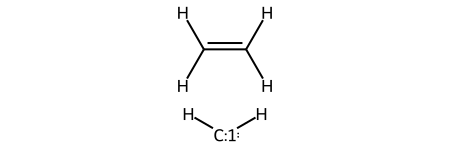

In [36]:
make_mol("[CH2:1].C=C>>[C:1]1CC1".split(">")[0], True, True, True)